# Import libraries
We will be using various libraries through the course of the workshop. This will test importing the most common libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data locations
Various data sources will be used throughout the workshop. All the data is hosted on SACAC's Google Drive folder, [here](https://drive.google.com/drive/folders/1YcMv9eZFhopJvv1TjTTH029e5ufIw8c_?usp=sharing). You can download the data directly, or you can read the data directly from Google Drive using `pandas`. We will use the latter approach in all examples.

The urls hosting the data are all collected in the following dictionary. Run the cell below to define the dictionary, which you can refer to throughout the workshop.

In [2]:
data_url = {
    'iof_data_1min_csv' : "https://drive.google.com/uc?id=1_jYVXj7mt8Zzpjn8WGI111G-kWRTbfjU",
    'iof_data_1min_parq' : "https://drive.google.com/uc?id=1j5SS136UzbSPu8TqG9RRUMi6-wWF9dzq",
    'mixingTank' :  "https://drive.google.com/uc?id=1b5Qn5LIa6KAE03Tq4yRVdhTyUmZLxRjt",
    'moons' : "https://drive.google.com/uc?id=1a9zTkPEpuHGj6LzGzuLe-JSLg_4GJef4",
    'open_iof_20min' : "https://drive.google.com/uc?id=15lkhdBfWnjlpgpEx4T2XcRApKr-dmBb0",
    'open_iof_cleaned' : "https://drive.google.com/uc?id=1WVbJvYsGy-iKlsW4WaDZrKy_NhK2tJLW",
    'test_data' : "https://drive.google.com/uc?id=1AUJ63mIM2we9k6H6H149YH1mSg83d3H7"
    }

## Test data handling and plotting
Load a data file using `pandas` and plot using `seaborne`

,x1,x2
count,3000.000000,3000.000000
mean,0.016008,2.484585
std,1.067382,2.159908
min,-1.993974,-1.551183
25%,-0.991901,-0.190361
50%,0.059023,3.767196
75%,1.008156,4.081946
max,1.997729,5.115426


<Axes: xlabel='x1', ylabel='x2'>

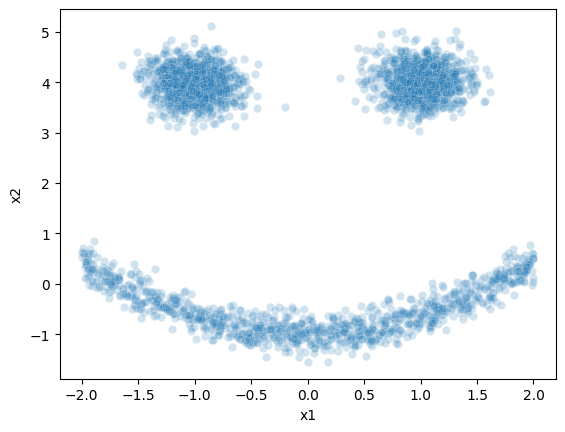

In [3]:
df = pd.read_csv(data_url['test_data'])
display(df.describe())
sns.scatterplot(data = df, x = 'x1', y = 'x2', alpha = 0.2)

## Test popular machine learning library
Cluster the data using `KMeans` from [scikit-learn](https://scikit-learn.org/stable/index.html)

<Axes: xlabel='x1', ylabel='x2'>

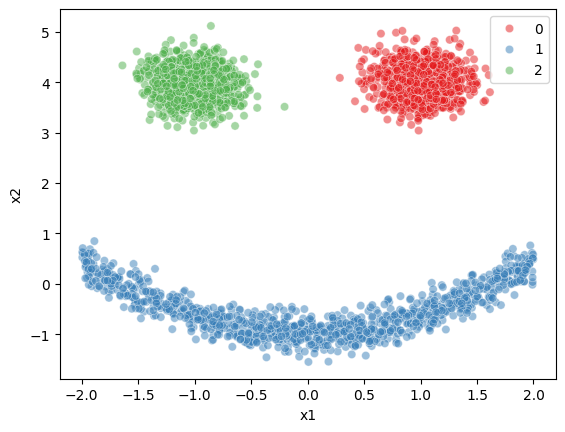

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = kmeans.labels_, palette = 'Set1', alpha = 0.5)

## Test popular deep learning library
Train an autoencoder using [keras](https://keras.io/)

In [15]:
from sklearn.preprocessing import StandardScaler
import keras

Z = StandardScaler().fit_transform(df)
aeEncoder = keras.Sequential([
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu',),
    keras.layers.Dense(2, activation='tanh'),
])

aeDecoder = keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(Z.shape[1])
])

# Autoencoder (combined model)
autoencoder = keras.Sequential([
    keras.layers.Input(shape=(Z.shape[1],)),
    aeEncoder,
    aeDecoder
])

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(Z, Z, epochs=50, batch_size=16)
# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Z_reconstructed = autoencoder.predict(Z)
plt.scatter(Z_reconstructed[:,0], Z_reconstructed[:,1], alpha = 0.5)

ModuleNotFoundError: No module named 'tensorflow'

# Test UMAP library
[UMAP](https://umap-learn.readthedocs.io/en/latest/) is a popular dimensionality reduction library that has seen frequent use recently.

In [7]:
from umap import UMAP
umap = UMAP(n_neighbors=5, min_dist=0.1)
L = umap.fit_transform(df)
plt.scatter(L[:,0], L[:,1], alpha = 0.5)

ImportError: cannot import name 'UMAP' from 'umap' (C:\Users\conra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\umap\__init__.py)